Reading config file: /opt/anaconda3/envs/deepforest/lib/python3.12/site-packages/deepforest/data/deepforest_config.yml


/opt/anaconda3/envs/deepforest/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/envs/deepforest/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=RetinaNet_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=RetinaNet_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


NEON.pt: 129MB [00:23, 5.49MB/s]                                                                                                       
/opt/anaconda3/envs/deepforest/lib/python3.12/site-packages/deepforest/main.py:87: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded 

Model was downloaded and saved to /opt/anaconda3/envs/deepforest/lib/python3.12/site-packages/deepforest/data/NEON.pt
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0


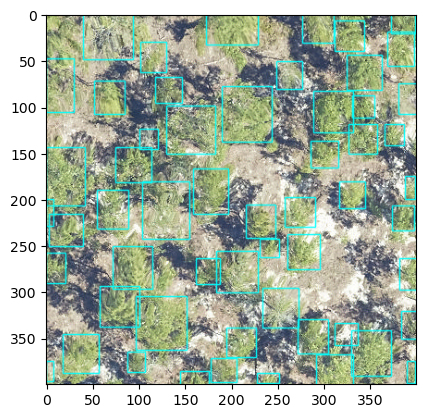

In [1]:
from deepforest import main
from deepforest import get_data
import matplotlib.pyplot as plt

model = main.deepforest()
model.use_release()

sample_image_path = get_data("OSBS_029.png")
img = model.predict_image(path=sample_image_path, return_plot=True)

#predict_image returns plot in BlueGreenRed (opencv style), but matplotlib likes RedGreenBlue, switch the channel order. Many functions in deepforest will automatically perform this flip for you and give a warning.
plt.imshow(img[:,:,::-1])

In [3]:
print(model)


deepforest(
  (model): RetinaNet(
    (backbone): BackboneWithFPN(
      (body): IntermediateLayerGetter(
        (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (bn1): FrozenBatchNorm2d(64, eps=0.0)
        (relu): ReLU(inplace=True)
        (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        (layer1): Sequential(
          (0): Bottleneck(
            (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn1): FrozenBatchNorm2d(64, eps=0.0)
            (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (bn2): FrozenBatchNorm2d(64, eps=0.0)
            (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn3): FrozenBatchNorm2d(256, eps=0.0)
            (relu): ReLU(inplace=True)
            (downsample): Sequential(
              (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias

In [5]:
%matplotlib inline

In [2]:
import rasterio

raster_path = "3318DC_16_2016_1143_RGB_RECT.tif"

try:
    with rasterio.open(raster_path) as dataset:
        print("Raster opened successfully!")
        print("Raster shape:", dataset.shape)
except Exception as e:
    print("Error opening raster:", str(e))


Raster opened successfully!
Raster shape: (11736, 9899)


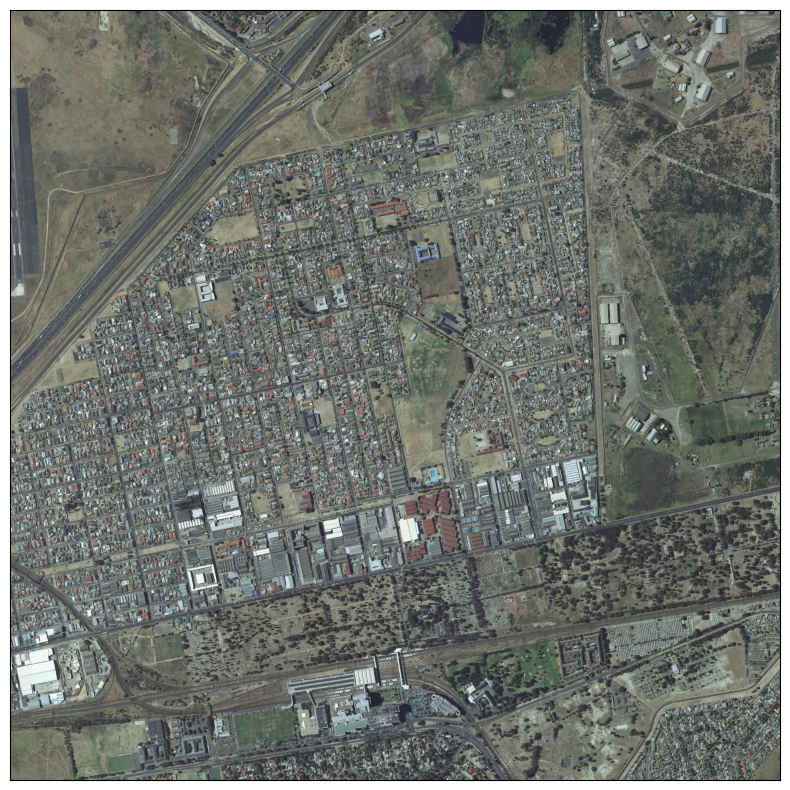

In [35]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the TIFF image
with rasterio.open(raster_path) as tif:
    img = tif.read([1, 2, 3])  # Reading the first three bands (RGB)
    img = np.moveaxis(img, 0, -1)  # Reorder dimensions from (bands, height, width) to (height, width, bands)

# Convert image to uint8 if necessary
if img.dtype != np.uint8:
    img = (255 * (img - img.min()) / (img.max() - img.min())).astype(np.uint8)

# Show the image
plt.figure(figsize=(10, 10))
plt.imshow(img[:6000, :6000])
plt.xticks([]), plt.yticks([])  # Hide tick values on X and Y axis
plt.show()

In [1]:
from deepforest import get_data

test_raster_path = "3318DC_16_2016_1143_RGB_RECT.tif"  # Built-in test image
predicted_raster = model.predict_tile(test_raster_path, return_plot=True, patch_size=800, patch_overlap=0.1)

# print("Prediction successful:", type(predicted_raster))


NameError: name 'model' is not defined

In [31]:
predicted_raster

array([[[ 97, 110, 112],
        [ 91, 104, 106],
        [ 92, 105, 107],
        ...,
        [123, 154, 145],
        [123, 154, 145],
        [124, 155, 146]],

       [[113, 126, 128],
        [111, 124, 126],
        [105, 118, 120],
        ...,
        [121, 152, 143],
        [121, 152, 143],
        [122, 153, 144]],

       [[113, 126, 128],
        [118, 131, 133],
        [109, 122, 124],
        ...,
        [121, 152, 145],
        [121, 152, 145],
        [121, 152, 143]],

       ...,

       [[ 81, 100,  79],
        [ 81, 100,  79],
        [ 81, 100,  79],
        ...,
        [138, 137,  82],
        [163, 162,  66],
        [243, 243,   9]],

       [[ 83, 102,  81],
        [ 82, 101,  80],
        [ 83, 102,  81],
        ...,
        [240, 240,   8],
        [241, 241,   7],
        [226, 226,  13]],

       [[ 81, 100,  79],
        [ 79,  98,  77],
        [ 78,  97,  76],
        ...,
        [123, 122,  61],
        [123, 122,  61],
        [105, 104,  67]]

In [8]:
predicted_raster['score'].describe()

count    936.000000
mean       0.160473
std        0.069306
min        0.100003
25%        0.114113
50%        0.136662
75%        0.179683
max        0.521003
Name: score, dtype: float64

In [9]:
predicted_raster[predicted_raster['score']>=0.5]

,xmin,ymin,xmax,ymax,label,score
0,2085.0,7200.0,2122.0,7217.0,Tree,0.521003


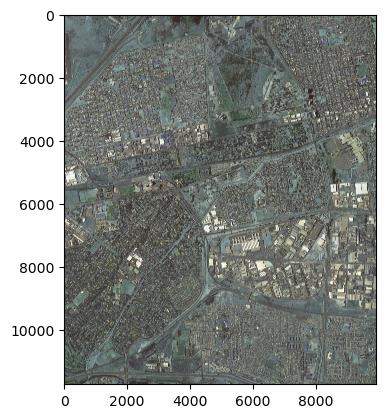

In [12]:
plt.imshow(predicted_raster)
plt.show()

In [7]:
predicted_raster.label.unique()

array(['Tree'], dtype=object)

In [13]:
import rasterio
from deepforest import get_data

# test_raster_path = get_data("OSBS_029.tif")  # Built-in test image
custom_raster_path = "3318DC_16_2016_1143_RGB_RECT.tif"

def print_raster_info(raster_path):
    with rasterio.open(raster_path) as dataset:
        print("\nFile:", raster_path)
        print("Driver:", dataset.driver)
        print("CRS:", dataset.crs)
        print("Width, Height:", dataset.width, dataset.height)
        print("Bands:", dataset.count)
        print("Dtype:", dataset.dtypes)
        print("Transform:", dataset.transform)

# print_raster_info(test_raster_path)  # Check DeepForest's test raster
print_raster_info(custom_raster_path)  # Check your raster



File: 3318DC_16_2016_1143_RGB_RECT.tif
Driver: GTiff
CRS: PROJCS["Projection: Transverse Mercator; Datum: WGS84; Ellipsoid: WGS84",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",19],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
Width, Height: 9899 11736
Bands: 3
Dtype: ('uint8', 'uint8', 'uint8')
Transform: | 0.50, 0.00,-46396.67|
| 0.00,-0.50,-3752510.46|
| 0.00, 0.00, 1.00|


In [ ]:
# import os

# csv_file = get_data("testfile_deepforest.csv")
# boxes = model.predict_file(csv_file=csv_file, root_dir = os.path.dirname(csv_file),savedir=".")

In [17]:
img = "3318DC_16_2016_1143_RGB_RECT.tif"
r = rasterio.open(img)
transform = r.transform 
crs = r.crs
print(crs)

PROJCS["Projection: Transverse Mercator; Datum: WGS84; Ellipsoid: WGS84",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",19],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [22]:
from pyproj import CRS

CRS.from_epsg(32617)

<Projected CRS: EPSG:32617>
Name: WGS 84 / UTM zone 17N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 84°W and 78°W, northern hemisphere between equator and 84°N, onshore and offshore. Bahamas. Ecuador - north of equator. Canada - Nunavut; Ontario; Quebec. Cayman Islands. Colombia. Costa Rica. Cuba. Jamaica. Nicaragua. Panama. United States (USA).
- bounds: (-84.0, 0.0, -78.0, 84.0)
Coordinate Operation:
- name: UTM zone 17N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [23]:
from deepforest import utilities

m = main.deepforest()
m.use_release(check_release=False)
df = m.predict_image(path=img)
gdf = utilities.annotations_to_shapefile(df, transform=transform, crs=crs)


Reading config file: /opt/anaconda3/envs/deepforest/lib/python3.12/site-packages/deepforest/data/deepforest_config.yml


/opt/anaconda3/envs/deepforest/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/envs/deepforest/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=RetinaNet_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=RetinaNet_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/opt/anaconda3/envs/deepforest/lib/python3.12/site-packages/deepforest/main.py:87: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code du

Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0


In [24]:
gdf

,xmin,ymin,xmax,ymax,label,score,geometry
0,7792.0,924.0,9686.0,2912.0,Tree,0.256461,"POLYGON ((-41553.425 -3752972.708, -41553.425 ..."
1,3574.0,3058.0,4807.0,4252.0,Tree,0.226827,"POLYGON ((-43992.925 -3754039.708, -43992.925 ..."
2,309.0,2491.0,2639.0,4900.0,Tree,0.225319,"POLYGON ((-45076.925 -3753756.208, -45076.925 ..."
3,6808.0,7759.0,8113.0,9003.0,Tree,0.224157,"POLYGON ((-42339.925 -3756390.208, -42339.925 ..."
4,4220.0,9350.0,6120.0,11276.0,Tree,0.213670,"POLYGON ((-43336.425 -3757185.708, -43336.425 ..."
5,2055.0,5649.0,3622.0,7170.0,Tree,0.213390,"POLYGON ((-44585.425 -3755335.208, -44585.425 ..."
6,8257.0,9535.0,9761.0,11043.0,Tree,0.189776,"POLYGON ((-41515.925 -3757278.208, -41515.925 ..."
7,5984.0,2378.0,7590.0,3906.0,Tree,0.188459,"POLYGON ((-42601.425 -3753699.708, -42601.425 ..."
8,504.0,6687.0,1884.0,8025.0,Tree,0.188370,"POLYGON ((-45454.425 -3755854.208, -45454.425 ..."
9,1787.0,1063.0,3605.0,2910.0,Tree,0.187035,"POLYGON ((-44593.925 -3753042.208, -44593.925 ..."


In [26]:
gdf.total_bounds

array([  -46396.42499192, -3758378.70800739,   -41475.92499192,
       -3752524.20800739])

In [27]:
gdf.crs

<Projected CRS: PROJCS["Projection: Transverse Mercator; Datum: WG ...>
Name: Projection: Transverse Mercator; Datum: WGS84; Ellipsoid: WGS84
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
image_path = get_data("OSBS_029.png")
boxes = model.predict_image(path=image_path, return_plot = True, color=(0, 165, 255), thickness=3)

In [ ]:
!pip install ipywidgets